<a href="https://colab.research.google.com/github/COMS-BC3159-SP24/colabs/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
Given we can calculate the gradient of our cost function, we can minimize it by moving in the opposite direction of the gradient using some learning rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's first generate some linear data and plot it!

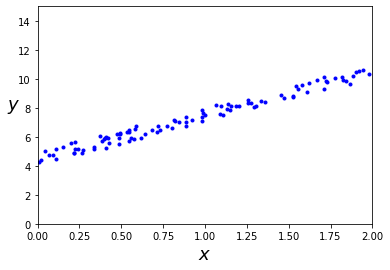

In [ ]:
N = 100
X = 2 * np.random.rand(N,1)
y = 4 + 3 * X + np.random.rand(N,1)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

Now lets take a guess for an initial values of a linear regression model. Say for example we set it to:
\begin{equation}
\theta_0 = 6, \; \theta_1 = 2 \quad \rightarrow \quad \hat{y}(x^{(i)};\theta) = \theta_1x^{(i)} + \theta_0 \quad \rightarrow \quad \hat{y}(x^{(i)};\theta) = 2x^{(i)} + 6
\end{equation}
Then if we plot this on our data we will find it is a bit off for a lot of the data points (but not a bad guess)!

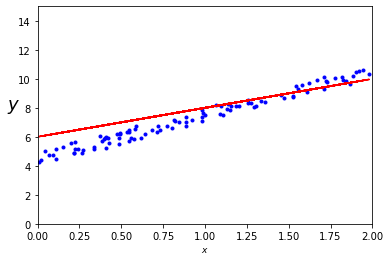

In [ ]:
t0_init = 6
t1_init = 2
y_hat = t1_init*X + t0_init
plt.plot(X,y,'b.')
plt.plot(X,y_hat,'r-')
plt.xlabel("$x$", fontsize=1|8)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

We can actually analytically compute how far off it is with a cost function (lets use a quadratic cost function here):

\begin{equation}
J(x;\theta) = \frac{1}{2} (\hat{Y}(x;\theta)-Y)^2 \approx \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)}(x;\theta) - y^{(i)})^2
\end{equation}

Lets plot where our current guess is on the cost landscape as a contour plot:

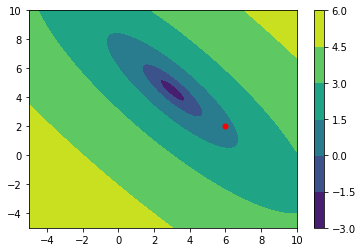

In [ ]:
def loss(t0,t1):
  y_hat_i = t1*X + t0
  delta = y_hat_i-y
  return sum(delta**2)/len(y_hat_i)

grid_density = 250
t0_list = np.linspace(-5.0, 10.0, grid_density)
t1_list = np.linspace(-5.0, 10.0, grid_density)
Z = np.zeros((grid_density,grid_density))
for t0_i in range(grid_density):
  for t1_i in range(grid_density):
    Z[t0_i,t1_i] = loss(t0_list[t0_i],t1_list[t1_i])

fig,ax=plt.subplots(1,1)
cp = ax.contourf(t0_list, t1_list, np.log(Z))
fig.colorbar(cp) # Add a colorbar to a plot

ax.plot([t0_init], [t1_init], marker='.', ms=10, color='r')
plt.show()

We can then use this cost to do gradient descent over our random data according to some learning rate $\alpha$ and update our estimates for the linear regression parameters $\theta$:

\begin{equation}
\theta_j: = \theta_j -\alpha \left(\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})\frac{\partial\hat{y}^{(i)}}{\partial \theta_j}\right)
\end{equation}

Noting that in our case since:
\begin{equation}
  \hat{y}(x^{(i)};\theta) = \theta_1x^{(i)} + \theta_0
\end{equation}
then:
\begin{equation}
\frac{\partial\hat{y}^{(i)}}{\partial \theta_0} = 1 \quad \quad
\frac{\partial\hat{y}^{(i)}}{\partial \theta_1} = x^{(i)}
\end{equation}

So lets compute a series of update with a learning rate $\alpha = 0.1$

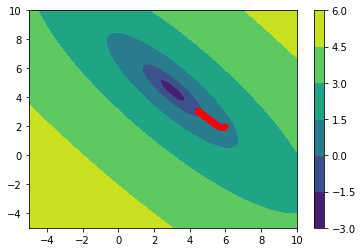

In [ ]:
alpha = 0.1
alpha_iters = 1000

def grad_loss(t0,t1):
  y_hat_i = t1*X + t0
  delta = y_hat_i-y
  delta_dt1 = [delta[i] * X[i] for i in range(len(delta))]
  grad_0 = np.sum(delta)/len(delta)
  grad_1 = np.sum(delta_dt1)/len(delta_dt1)
  return (grad_0, grad_1)

def compute_history_of_thetas(alpha, alpha_iters):
  t0s = [t0_init]
  t1s = [t1_init]
  for i in range(alpha_iters):
    t0_curr = t0s[-1]
    t1_curr = t1s[-1]
    grad = grad_loss(t0_curr,t1_curr)
    t0s.append(t0_curr - alpha*grad[0])
    t1s.append(t1_curr - alpha*grad[1])
  return t0s, t1s

t0s, t1s = compute_history_of_thetas(alpha, alpha_iters)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(t0_list, t1_list, np.log(Z))
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(t0s, t1s, marker='.', ms=10, color='r')
plt.show()

What happens if we increase the learning rate? (It looks like we are moving slowly)

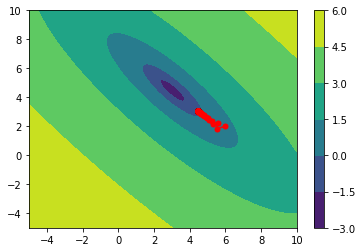

In [ ]:
t0s, t1s = compute_history_of_thetas(0.85, alpha_iters)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(t0_list, t1_list, np.log(Z))
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(t0s, t1s, marker='.', ms=10, color='r')
plt.show()

Ok that looks better but that's still pretty slow. Can we go faster?

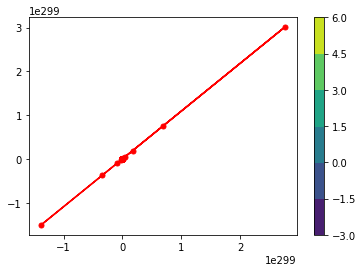

In [ ]:
t0s, t1s = compute_history_of_thetas(1.5, alpha_iters)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(t0_list, t1_list, np.log(Z))
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(t0s, t1s, marker='.', ms=10, color='r')
plt.show()

What just happend? We diverged! We can't take took big of steps! We'll explore this more next class!